# Principal Component Regression (PCR)

* Dimension reduction is applied to features(columns).Then the Principal Component Regression model is created with the remaining  features(columns)


* This method is used if there is a high correlation between the independent variables.



* Highly related independent variables that affect the dependent variable cause multiple linear connection problem.



* This problem increases the variance of the coefficients of the independent variables and creates bias.


* Independent variables with a high correlation between each other contain similar predictive information on the dependent variable.


* In addition , in cases where the number of variables(features or columns) is more than the number of observations , it is called the multidimensionality curse.In these cases, this regression model is used by reducing the  dimension of features.



## 1-) PCR Model

In [80]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


## 1.1-)Transform the Categorigal variables into Numerical variables 

In [83]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


## 1.2-)Dealing with Duumy Variable Trap

In [84]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [85]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [86]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

# The columnn of X represents  the independent variabales

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [87]:
y = df["Salary"]
y
# The column of y represent  the dependent variabale

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

## 1.3-) Train - Test Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


## 1.4-)Data Standardization 

In [90]:
from sklearn.preprocessing import scale 

In [91]:
X_scale=scale(X_train)
X_scale[0:1]

array([[-0.52262793, -0.36609208,  0.02406249, -0.12266806, -0.34369699,
        -0.40963247, -1.10471461, -0.99114633, -0.945558  , -0.6928145 ,
        -0.91630243, -0.87918027, -0.85228393, -0.52007444, -0.39867767,
        -0.07254437,  1.02571114, -1.02571114,  1.06831847]])

## 1.5-)Principal Component Analysis

In [92]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
X_reduced_train= pca.fit_transform(X_scale)

In [93]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [94]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:14]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28, 98.01, 98.68, 99.18, 99.49])

* 38.18  ===== >> means that the first component (first variable == first independent variable) represent  38.18 percent of the variance of the dependent variable.



* 59.88  ===== >> means that the first and second independent variables cumulatively (together in total) represent  59.88 percent of the variance of the dependent variable.



* 70.88  ====== >>>>> means that 1st,2nd. and  the 3rd independent variables cumulatively (together in total) represent 70.88 percent of the variance of the dependent variable.




* Normally there are 19 independent variables.


* All of these 19 independent variables can cumulatively represent  100 percent of the variance of the dependent variable.



* But if we create a model with 5 independent variables.These Independent variables can represent 84.18 percent of the variance of the dependent variable.



 


In [95]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [96]:
pcr_model=lm.fit(X_reduced_train, y_train)

In [97]:
pcr_model.intercept_

543.4834416243655

In [98]:
pcr_model.coef_
# these number are the coefficient of independent variables

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

# 2-) Predicting the values by PCR

In [99]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [100]:
# Training error before model tuning

from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_train, y_pred))


289.3292825564976

In [101]:
# R-squared value for traning set before model tuning

r2_score(y_train, y_pred)

0.5770075250410179

In [104]:
pca2 = PCA()

In [105]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [106]:
y_pred1 = pcr_model.predict(X_reduced_test)

In [107]:
## Test error before model tuning
np.sqrt(mean_squared_error(y_test, y_pred1))

405.15753641499646

In [108]:
# R-squared value for test set before model tuning

r2_score(y_test, y_pred1)

0.24170463640313278

# 3-)Model Tuning

* Initially we created our model using 19 reduced independent variables (using all reduced independent variables)).



* We will reconstruct our model by choosing the most optimally reduced number of independent variables, namely the external parameters (hyperparameters).Thus we will tune our model.

In [109]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
pcr_model2 = lm2.fit(X_reduced_train[:,0:10], y_train)
y_pred2 = pcr_model2.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred2)))

390.79142556822234


In [110]:
from sklearn import model_selection

In [111]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [112]:
lm3= LinearRegression()

In [113]:
RMSE = []

In [114]:
X_reduced_train.shape[1]

19

In [115]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm3, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [116]:
RMSE

[339.00500170955814,
 335.4728032081954,
 335.2590543755473,
 335.7884270015903,
 331.0974063017349,
 329.0340331060009,
 328.19368073916246,
 331.4554758418423,
 333.6775747849661,
 339.50330386848293,
 340.5292981595513,
 344.5766545758868,
 351.26086167973125,
 356.4667660069187,
 357.230916418857,
 342.78343615942964,
 343.74562772537445,
 344.7519862573738,
 353.37050529908544]

In [117]:
import matplotlib.pyplot as plt

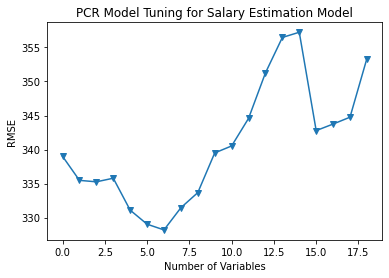

In [118]:
plt.plot(RMSE, '-v')
plt.xlabel('Number of Variables')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Salary Estimation Model');

* If the number of independent variables is 6, the RMSE value is the smallest.



* The optimal number of independent variables is 6.



* Thus, instead of using 19 independent variables to create the PRC model, we will create our PCR model using 6 basic independent variables.


In [119]:
lm4= LinearRegression()


In [120]:
pcr_model4 = lm4.fit(X_reduced_train[:,0:6], y_train)


In [121]:
y_pred4= pcr_model4.predict(X_reduced_train[:,0:6])

In [122]:
# train error after model tuning
print(np.sqrt(mean_squared_error(y_train, y_pred4)))

308.8265983094501


In [123]:
y_pred5 = pcr_model4.predict(X_reduced_test[:,0:6])

In [124]:
#test error after model tuning
print(np.sqrt(mean_squared_error(y_test, y_pred5)))

393.1198700096223


In [156]:
# R-squared value for test set after model tuning

r2_score(y_test, y_pred5)

0.28609479519381953

In [125]:
pcr_model4.intercept_ # constant of optimum model

543.4834416243655

In [127]:
pcr_model4.coef_ # the coefficient of the independents variable  of optimum model

array([111.13977427, -29.34209502,  26.29799759, -38.47549852,
       -56.9200785 ,  54.44779423])

# 4-)Modelling with STATSMODELS 

In [160]:
import statsmodels.api as sm

In [161]:
lm=sm.OLS(y_train, X_reduced_train[:,0:6] )

In [162]:
model=lm.fit()

In [163]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.208
Model:                            OLS   Adj. R-squared (uncentered):              0.183
Method:                 Least Squares   F-statistic:                              8.353
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                    4.77e-08
Time:                        01:24:55   Log-Likelihood:                         -1547.8
No. Observations:                 197   AIC:                                      3108.
Df Residuals:                     191   BIC:                                      3127.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           111.1398     16.792      6.618      0.000      78.017     144.262
x2           -29.3421     22.273     -1.317      0.189     -73.275      14.591
x3            26.2980     31.292      0.840      0.402     -35.423      88.019
x4           -38.4755     36.676     -1.049      0.295    -110.817      33.866
x5           -56.9201     45.081     -1.263      0.208    -145.841      32.001
x6            54.4478     50.204      1.085      0.279     -44.578     153.474
==============================================================================
Omnibus:                       21.315   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.088
Skew:                           0.490   Prob(JB):                     9.82e-11
Kurtosis:                       5.157   Cond. No.                         2.99
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""